# Исследование объявлений о продаже квартир

Дан набор данных с объявлениями о продаже квартир в Санкт-Петербурге и Лен.области за несколько лет. Требуется научиться определять рыночную стоимость объектов недвижимости и установить параметры, влияющие на их стоимость. Это позволит построить автоматизированную систему, отслеживающую аномалии и мошенничество. 

# План работ над проектом
    
1. Открыть файл с данными /datasets/real_estate_data.csv, изучить общую информацию
2. Выполнить предобработку данных, определить и изучить пропущенные значения. По возможности заполнить пропуски, объясить выбор значений для заполнения, указать возможные причины пропусков, привести данные к нужным типам, пояснить за изменения.
3. Посчитать и добавить в таблицу цену квадратного метра, день недели, месяц и год публикации объявления, категорию этажа квартиры (первый, последний, другой), соотношение жилой и общей площади, отношение площади кухни к общей.
4. Провести исследовательский анализ данных и выполнить инструкции:
    * Изучить параметры: площадь, цена, число комнат, высота потолков. Построить гистограмму для каждого параметра.
    * Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Описать обычное время продажи, быструю продажу, долгую продажу.
    * Убрать редкие и выбивающиеся значения. Описать обнаруженные особенности.
    * Ответить на вопрос, какие факторы больше всего влияют на стоимость квартиры. Изучить, зависит ли цена от метража, числа комнат, удалённости от центра, этажа, даты размещения (дня недели, месяца, года).
    * Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в них. Выделить населённые пункты с самой высокой и низкой стоимостью жилья.
    * Выделить квартиры в Санкт-Петербурге. Выяснить размер центральной зоны:
        * Создать столбец с расстоянием до центра в километрах, округлить значения до целых. 
        * Посчитать среднюю цену для каждого километра. 
        * Построить график зависимости цены от удалённости от центра. Определить центральную зону (граница, где график сильно меняется).
    * Выделить сегмент квартир в центре Санкт-Петербурга. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Изучить, как зависит стоимость квартиры в центре  от числа комнат, этажа, удалённости от центра, даты размещения объявления. Сделать выводы по центру, сравнить с выводами по всему СПб.
5. Написать общий вывод.

## Описание данных

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Шаг 1. Открываем файл с данными, изучаем

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
#data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
real_estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
real_estate_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
real_estate_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
#смотрим, какие уникальные значения есть у столбцов, нужных для проекта: 
print("Количество объявлений:",real_estate_data.shape[0])
print('Количество населенных пунктов:',len(real_estate_data['locality_name'].unique()))

Количество объявлений: 23699
Количество населенных пунктов: 365


In [7]:
first_ticket = real_estate_data['first_day_exposition'].min()
last_ticket = real_estate_data['first_day_exposition'].max()
print('Первое объявление:',first_ticket)
print('Последнее объявление',last_ticket)
#Данные за 4,5 года

print('За сколько дней данные:',pd.to_datetime(last_ticket,format='%Y-%m-%dT%H:%M:%S')-pd.to_datetime(first_ticket,format='%Y-%m-%dT%H:%M:%S'))
#print('В среднем объявлений в день:',23699/1618)

Первое объявление: 2014-11-27T00:00:00
Последнее объявление 2019-05-03T00:00:00
За сколько дней данные: 1618 days 00:00:00


In [8]:
print(real_estate_data.query("locality_name != locality_name")) #смотрим записи, у которых отсутствует населенный пункт

       total_images  last_price  total_area first_day_exposition  rooms  \
1097              3   8600000.0       81.70  2016-04-15T00:00:00      3   
2033              6   5398000.0       80.00  2017-05-30T00:00:00      3   
2603             20   3351765.0       42.70  2015-09-20T00:00:00      1   
2632              2   5130593.0       62.40  2015-10-11T00:00:00      2   
3574             10   4200000.0       46.50  2016-05-28T00:00:00      2   
4151             17  17600000.0       89.50  2014-12-09T00:00:00      2   
4189              7   9200000.0       80.00  2015-12-10T00:00:00      3   
4670              1   5500000.0       83.00  2015-08-14T00:00:00      3   
5343             19  13540000.0       85.50  2016-01-20T00:00:00      3   
5707              7   3700000.0       30.00  2016-04-29T00:00:00      1   
6765             20   4895892.0       60.70  2015-03-12T00:00:00      2   
7114              5   4250000.0       56.00  2016-03-16T00:00:00      3   
7330              8   510

In [9]:
real_estate_data['locality_name'].unique() #смотрим, какие есть населенные пункты

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

### Вывод

Данные в файле склеились, поэтому для дальнейшей работы с ним дополнительно при чтении указываем разделитель - знак табуляции (\t). 

Всего в файле 23699 записей, есть пропуски (не везде указаны высота потолков, количество этажей, метраж жилой площади, число балконов и пр.) - как в пользовательских данных, так и в автоматических.</br>
Касательно данных с пропусками, вводимых пользователем - чтобы избежать подобных пропусков, следует соответствующие поля формы сделать обязательными для заполнения. </br>
Касательно данных с пропусками, полученных автоматически - видимо, для них не было достаточных картографических данных.

Есть аномально большие и аномально маленькие значения, например: высота потолка (1м, 100м), жилая площадь (2 м кв.).

Для удобства работы удалим столбцы, которые нам не нужны для анализа (количество парков поблизости и т.п.).

У 49 записей не указан населенный пункт, их отбросим, поскольку тут уже ничего не сделать - между записями ничего общего не найти. Возможно, эти записи добавлены в базу из какого-то файла, у которого название населенного пункта было в названии.

Еще обнаружилось, что у нас есть дубли вида Кудрово/деревня Кудрово, Мурино/поселок Мурино, поэтому мы типы населенных пунктов из названий уберем.

### Шаг 2. Предобработка данных

In [10]:
#Cтолбцы, которые нам не нужны для дальнейшего анализа, перед удалением выносим в отдельную таблицу
real_estate_data_del_col = real_estate_data[['total_images','is_apartment','studio','open_plan','balcony','airports_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest']]

In [11]:
#Удаляем столбцы, которые нам не нужны для дальнейшего анализа
real_estate_data.drop(['total_images','is_apartment','studio','open_plan','balcony','airports_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest'], axis='columns', inplace=True)

In [12]:
#Удаляем строки с пропусками в locality_name
real_estate_data.dropna(subset = ['locality_name'], inplace = True)

In [13]:
#Удаляем из названия населенного пункта его тип
def LN_Cleaner(locality_name):
    types_ln = ['посёлок при железнодорожной станции ','поселок при железнодорожной станции ','коттеджный поселок ','коттеджный посёлок ','поселок городского типа имени ','посёлок городского типа имени ','посёлок городского типа ','поселок городского типа ','поселок станции ','посёлок станции ','городской посёлок ','городской поселок ','посёлок ','поселок ','деревня ','село ','садоводческое некоммерческое товарищество ','садовое товарищество ',]
    for tln in types_ln:
        end_substr = locality_name.find(tln)
        if end_substr >= 0:
            return locality_name.partition(tln)[2]
    return locality_name

real_estate_data['locality_name'] = real_estate_data['locality_name'].apply(LN_Cleaner)        

In [15]:
#print('Количество населенных пунктов после обработки:',len(real_estate_data['locality_name'].unique())) #сколько их осталось
print('Количество населенных пунктов после обработки:',real_estate_data['locality_name'].nunique()) #сколько их осталось

Количество населенных пунктов после обработки: 305


In [16]:
#Заполняем пропуски, меняем типы данных для столбца floors_total (всего этажей)
#Сводная таблица по медианному количеству этажей по каждому населенному пункту
#data.pivot_table(index='locality_name', values='floors_total').plot(grid=True,figsize=(24,5),style='o')
locality_floors_total_median = real_estate_data.pivot_table(index='locality_name', values='floors_total', aggfunc=['median'])
locality_floors_total_median.columns = ['floors_total_m',]
#print(locality_floors_total_median) #раскомм., если надо посмотреть
#заполняем пропуски в floors_total - присваиваем медианное значение населенного пункта
for i in range(locality_floors_total_median.shape[0]):
    ln_param = locality_floors_total_median.index[i]
    ft_med = locality_floors_total_median['floors_total_m'][i] 
    real_estate_data.loc[real_estate_data['locality_name'] == ln_param, 'floors_total'] = real_estate_data.loc[real_estate_data['locality_name'] == ln_param, 'floors_total'].fillna(ft_med)

#посмотрим записи, в которых квартира выше последнего этажа
data_floors_total_strange = real_estate_data.query('floors_total < floor')
print('Количество случаев, когда этаж квартиры выше последнего этажа:',data_floors_total_strange.shape[0])

#если количество этажей (floors_total) меньше указанного этажа (floor), приравниваем floors_total к floor
#real_estate_data.loc[real_estate_data['floors_total'] < real_estate_data['floor'], 'floors_total'] = real_estate_data['floor'] 
#меняем тип данных на int
real_estate_data['floors_total'] = real_estate_data['floors_total'].astype('int')

Количество случаев, когда этаж квартиры выше последнего этажа: 32


In [17]:
#Для столбца first_day_exposition (дата публикации) меняем тип данных на date
real_estate_data['first_day_exposition'] = pd.to_datetime(real_estate_data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [18]:
##Заполняем пропуски в площадях

#Заполняем пропуски в жилой площади (living_area) 
#если есть площадь кухни (kitchen_area), умножаем ее на два (т.е. примерно коридор и туалет) и вычитаем результат из общей (total_area)
real_estate_data.loc[(real_estate_data['living_area'] != real_estate_data['living_area']) & (real_estate_data['kitchen_area'] == real_estate_data['kitchen_area']), 'living_area'] = real_estate_data['total_area'] - (real_estate_data['kitchen_area']*2)

#Заполняем пропуски в площади кухни (kitchen_area) 
#если есть жилая площадь (living_area), вычитаем ее из общей (total_area), результат делим на два
real_estate_data.loc[(real_estate_data['kitchen_area'] != real_estate_data['kitchen_area']) & (real_estate_data['living_area'] == real_estate_data['living_area']), 'kitchen_area'] = (real_estate_data['total_area'] - real_estate_data['living_area'])/2

la_med=real_estate_data['living_area'].median()
real_estate_data['living_area'] = real_estate_data['living_area'].fillna(la_med)

ka_med=real_estate_data['kitchen_area'].median()
real_estate_data['kitchen_area'] = real_estate_data['kitchen_area'].fillna(ka_med)

In [22]:
#Проверяем на дубликаты
print('Дубликатов:',real_estate_data.duplicated().sum()) 

Дубликатов: 0


In [23]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 12 columns):
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
kitchen_area            23650 non-null float64
locality_name           23650 non-null object
cityCenters_nearest     18139 non-null float64
days_exposition         20470 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 3.0+ MB


1. Удалили столбцы, не нужные нам для анализа (расстояние до парка, и т.п.).

2. Удалили строки с пропусками в locality_name (населенный пункт).

3. Удалили из названий населенных пунктов их типы (поселок, село), в итоге населенных пунктов у нас было 365, а стало 305.

4. Для столбца floors_total (количество этажей) сделали сводную таблицу с медианой по каждому населенному пункту, заполнили пропуски, поменяли тип на int

5. Для столбца first_day_exposition (день публикации) поменяли тип str на date

6. Для столбца living_area заполнили пропуски следующим образом:

    6.1. Если в строке есть kitchen_area (площадь кухни), умножаем ее на 2 (площадь кухни примерно равно площади коридор+туалет) и вычитаем получившуюся площадь бытовых помещений из общей площади.
    
    6.2. Если в строке нет kitchen_area (площадь кухни), заполняем пропуски в living_area медианным значением.
   
7. Для столбца kitchen_area заполнили пропуски следующим образом:

    7.1. Если в строке есть living_area (жилая площадь), вычитаем ее из общей площади, результат (площадь бытовых помещений) делим на два (кухня + (коридор+туалет))
    
    7.2. Если в строке нет living_area (жилая площадь), заполняем пропуски в kitchen_area медианным значением.

8. Для столбца cityCenters_nearest (расстояние до центра) сделали сводную таблицу с медианой по каждому населенному пункту, заполнили пропуски, поменяли тип на int.

9. Для столбца days_exposition (продолжительность размещения) сделали сводную таблицу с медианой по каждому населенному пункту, заполнили пропуски, поменяли тип на int.


У нас данные за 1618 дней, а максимальное время продажи квартиры - 1580 дней - похоже, какие-то объявления просто забыли снять с публикации.

### Шаг 3. Добавляем столбцы

In [24]:
#Добавляем столбец с ценой квадратного метра
real_estate_data['price_metr'] = real_estate_data['last_price']/real_estate_data['total_area']

In [25]:
#Добавляем столбцы с днем недели, месяцем и годом публикации объявления
real_estate_data['weekday'] = real_estate_data['first_day_exposition'].dt.weekday
real_estate_data['month'] = pd.DatetimeIndex(real_estate_data['first_day_exposition']).month
real_estate_data['year'] = pd.DatetimeIndex(real_estate_data['first_day_exposition']).year

In [26]:
#Добавим еще столбец с датой публикации объявления в unix-формате (в конце пригодится)
real_estate_data['first_day_exposition_unix'] = pd.DatetimeIndex(real_estate_data['first_day_exposition']).astype('int')

In [27]:
# Добавляем столбец с категорией этажа (первый, последний, другой)
def FloorCategorizer(floor_param,floors_total_param):
    if floor_param == 1:
        return 'первый'
    if floor_param >= floors_total_param:
        return 'последний'
    return 'другой'

real_estate_data['floor_category'] = real_estate_data.apply(lambda x: FloorCategorizer(x.floor, x.floors_total), axis=1)
#нашел решение в инете, но честно говоря пока не в курсе, что за lambda x такая


In [28]:
#Добавляем столбец с соотношением жилой и общей площади
real_estate_data['living_and_total'] = real_estate_data['living_area']/real_estate_data['total_area']

In [29]:
#Добавляем столбец с отношением площади кухни к общей
real_estate_data['kitchen_and_total'] = real_estate_data['kitchen_area']/real_estate_data['total_area']

In [30]:
real_estate_data.head() #смотрим

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_metr,weekday,month,year,first_day_exposition_unix,floor_category,living_and_total,kitchen_and_total
0,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028.0,NaN,120370.370370,3,3,2019,1551916800000000000,другой,0.472222,0.231481
1,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,11.0,Шушары,18603.0,81.0,82920.792079,1,12,2018,1543881600000000000,первый,0.460396,0.272277
2,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,8.3,Санкт-Петербург,13933.0,558.0,92785.714286,3,8,2015,1440028800000000000,другой,0.612500,0.148214
3,64900000.0,159.0,2015-07-24,3,NaN,14,30.0,9,9.0,Санкт-Петербург,6800.0,424.0,408176.100629,4,7,2015,1437696000000000000,другой,0.188679,0.056604
4,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098.0,121.0,100000.000000,1,6,2018,1529366400000000000,другой,0.320000,0.410000


1. Добавили столбец с ценой квадратного метра.
2. Добавили столбец с днем недели размещения объявления.
3. Добавили столбец с месяцем размещения объявления.
4. Добавили столбец с годом размещения объявления.
5. Добавили столбец с датой размещения объявления в unix-формате
5. Добавили столбец с категорией этажа квартиры (первый/последний/другой).
6. Добавили столбец соотношения жилой и общей площади.
7. Добавили столбец отношение площади кухни к общей.

### Шаг 4. Проводим исследовательский анализ данных

In [31]:
real_estate_data.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,price_metr,weekday,month,year,first_day_exposition_unix,living_and_total,kitchen_and_total
count,2.365000e+04,23650.000000,23650.000000,14490.000000,23650.000000,23650.000000,23650.000000,23650.000000,18139.000000,20470.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,2.365000e+04,23650.000000,23650.000000
mean,6.541127e+06,60.329069,2.070106,2.771287,10.672304,34.353000,5.893277,10.426366,14197.860742,180.753200,9.943225e+04,2.568710,6.401564,2017.370021,1.510272e+18,0.568224,0.187223
std,1.089640e+07,35.661808,1.078620,1.261593,6.585517,22.117661,4.883317,5.840445,8606.830295,219.777916,5.033794e+04,1.788808,3.491418,1.037806,3.150338e+16,0.123101,0.073097
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,-26.000000,1.000000,0.000000,181.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,1.417046e+18,-0.430464,0.000000
25%,3.400000e+06,40.000000,1.000000,2.520000,5.000000,19.000000,2.000000,7.100000,9241.000000,45.000000,7.661497e+04,1.000000,3.000000,2017.000000,1.494806e+18,0.491969,0.133623
50%,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,13105.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,1.513037e+18,0.569124,0.173077
75%,6.799000e+06,69.700000,3.000000,2.800000,16.000000,41.900000,8.000000,11.627500,16293.000000,231.000000,1.142742e+05,4.000000,10.000000,2018.000000,1.535328e+18,0.642857,0.231023
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,511.000000,33.000000,115.000000,65968.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.556842e+18,2.307692,0.787879


In [32]:
#Функция построения гистограммы (интервал рассчитываем с помощью квартилей)
def HistBuilder(param):
    res_des = param.describe()

    iqr = res_des[6] - res_des[4]
    k = 3
    b = 8
    
    range_s = res_des[4]-k*iqr
    if range_s < res_des[3]:
        range_s = res_des[3]

    range_f = res_des[6]+k*iqr
    if range_f > res_des[7]:
        range_f = res_des[7]

    param.hist(bins=b,range=(range_s,range_f))


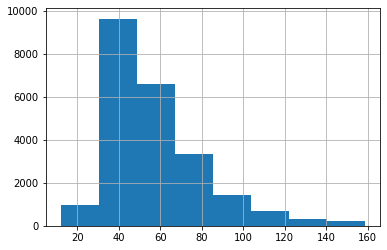

In [33]:
#Общая площадь
#real_estate_data['total_area'].hist(bins=100,range=(0,900)) #range=(0,40) #range=(200,700)
HistBuilder(real_estate_data['total_area'])

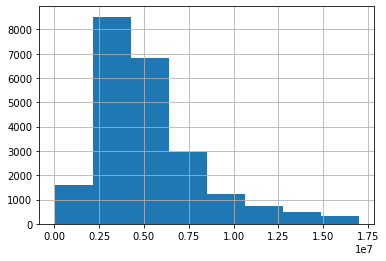

In [34]:
#Цена
#real_estate_data['last_price'].hist(bins=100,range=(0,800000000)) #range=(40000000,200000000) #range=(0,700000)
HistBuilder(real_estate_data['last_price'])

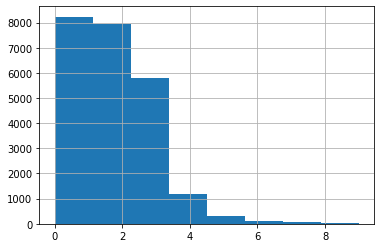

In [35]:
#Число комнат
#real_estate_data['rooms'].hist(bins=20,range=(0,19)) #range=(0,4)  #range=(8,19)
HistBuilder(real_estate_data['rooms'])

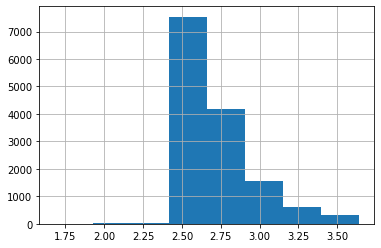

In [36]:
#Высота потолков
#real_estate_data['ceiling_height'].hist(bins=101,range=(0,100)) #range=(2,3) #range=(4,6)
HistBuilder(real_estate_data['ceiling_height'])

Построили гистограммы для:
1. общей площади (total_area), 
2. цены (last_price), 
3. числа комнат (rooms), 
4. высоты потолков (ceiling_height).

Процесс построения графиков автоматизирован через функцию HistBuilder. Интервал рассчитывается автоматически от от Q1-3*IQR до Q3+3*IQR, число корзин = 8  

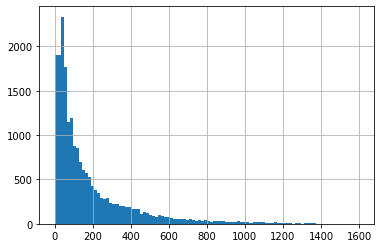

In [37]:
#Продолжительность размещения объявления (время продажи квартиры)
real_estate_data['days_exposition'].hist(bins=100,range=(0,1600)) #range=(0,10) #range=(800,1600)

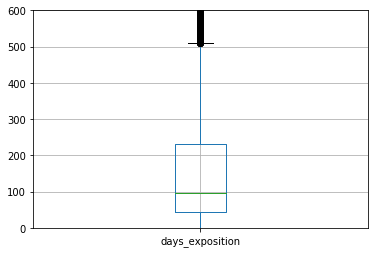

In [38]:
#Построим еще и диаграмму размаха для наглядности
plt.ylim(0, 600)
real_estate_data.boxplot('days_exposition')

In [39]:
print('Среднее времени продажи квартиры, дней:',real_estate_data['days_exposition'].mean())
print('Медиана времени продажи квартиры, дней:',real_estate_data['days_exposition'].median())
print('Минимальное время продажи квартиры, дней:',real_estate_data['days_exposition'].min())
print('Максимальное время продажи квартиры, дней:',real_estate_data['days_exposition'].max())

Среднее времени продажи квартиры, дней: 180.7531998045921
Медиана времени продажи квартиры, дней: 95.0
Минимальное время продажи квартиры, дней: 1.0
Максимальное время продажи квартиры, дней: 1580.0


In [40]:
#Горячая десятка по продолжительности продажи квартиры
real_estate_data.sort_values(by = 'days_exposition', ascending=False).head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_metr,weekday,month,year,first_day_exposition_unix,floor_category,living_and_total,kitchen_and_total
18843,3500000.0,48.20,2014-12-15,2,2.50,5,27.40,2,7.70,Новое Девяткино,NaN,1580.0,72614.107884,0,12,2014,1418601600000000000,другой,0.568465,0.159751
1109,34878556.0,95.80,2014-12-09,2,NaN,6,58.30,5,20.00,Санкт-Петербург,318.0,1572.0,364076.784969,1,12,2014,1418083200000000000,другой,0.608559,0.208768
9553,10600000.0,80.00,2014-12-09,3,2.85,17,44.00,9,15.00,Санкт-Петербург,17110.0,1553.0,132500.000000,1,12,2014,1418083200000000000,другой,0.550000,0.187500
1885,13300000.0,79.60,2014-12-09,2,3.00,8,42.70,7,18.00,Санкт-Петербург,11096.0,1513.0,167085.427136,1,12,2014,1418083200000000000,другой,0.536432,0.226131
6691,4400000.0,42.98,2014-12-12,1,NaN,5,18.72,1,11.31,Пушкин,30358.0,1512.0,102373.196836,4,12,2014,1418342400000000000,первый,0.435551,0.263146
20969,13300000.0,133.00,2015-02-11,4,3.00,5,58.00,2,45.00,Санкт-Петербург,5032.0,1512.0,100000.000000,2,2,2015,1423612800000000000,другой,0.436090,0.338346
14093,9500000.0,100.00,2015-02-19,4,3.00,5,76.00,5,10.00,Санкт-Петербург,4798.0,1497.0,95000.000000,3,2,2015,1424304000000000000,последний,0.760000,0.100000
15313,9278000.0,139.80,2014-12-28,4,2.80,5,30.00,4,9.00,Сестрорецк,35515.0,1489.0,66366.237482,6,12,2014,1419724800000000000,другой,0.214592,0.064378
19123,5990000.0,82.00,2015-02-19,3,3.00,4,60.00,2,8.00,Павловск,34619.0,1485.0,73048.780488,3,2,2015,1424304000000000000,другой,0.731707,0.097561
11955,11400000.0,76.00,2014-12-09,2,NaN,9,36.00,3,14.00,Санкт-Петербург,11096.0,1484.0,150000.000000,1,12,2014,1418083200000000000,другой,0.473684,0.184211


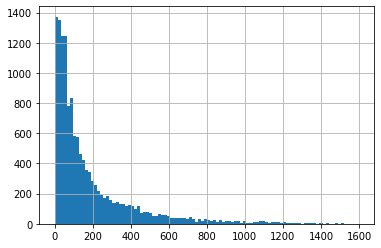

In [41]:
#Часто попадается СПб - построим по его объявлениям отдельную гистограмму
days_exposition_spb = real_estate_data.query('locality_name == "Санкт-Петербург"')
days_exposition_spb['days_exposition'].hist(bins=100,range=(0,1600))

In [42]:
#Горячая десятка по количеству объявлений
real_estate_data['locality_name'].value_counts().sort_values(ascending=False).head(10) 

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

1. Построили гистаграмму времени продажи квартиры. 
2. Посчитали среднее и медиану. Согласно медиане продажа квартиры обычно занимает 3 месяца. 
Если судить по квантилям, если квартиру продали менее чем за полтора месяца (45 дней), можно считать, что продажи прошли очень быстро, а если объявление висит дольше 7,5 месяцев (231 день) - это уже слишком долго. 
3. В десятке лидеров по продолжительности продажи чаще всего встречается СПб и гистограмму в основном формируют его объявления - оно и понятно, 66% объявлений - о продаже квартир в СПб.
4. Пик с кучей объявлений в 95 дней возник скорей всего из-за того, что мы заполнили пропуски в столбце продолжительности размещения медианным значением (95).

In [43]:
#Функция построения диаграммы размаха
def BoxplotBuilder(data,param):
    res_des = data[param].describe()
    iqr = res_des[6] - res_des[4]
    k_box = 3
    k_garbage = 1.5
    
    #Рисуем диаграмму размаха    
    range_s = res_des[4]-k_box*iqr
    if range_s < res_des[3]:
        range_s = res_des[3]

    range_f = res_des[6]+k_box*iqr
    if range_f > res_des[7]:
        range_f = res_des[7]

    plt.ylim(range_s, range_f)
    data.boxplot(param)

    #Считаем границы отсечения
    garbage_bot = res_des[4]-k_garbage*iqr
    if garbage_bot < res_des[3]:
        garbage_bot = res_des[3]

    garbage_top = res_des[6]+k_garbage*iqr
    if garbage_top > res_des[7]:
        garbage_top = res_des[7]
    
    print('Отбрасываем значения',param,'<',garbage_bot,'и >',garbage_top)
    garbage =[garbage_bot,garbage_top]
    
    return garbage
    

Отбрасываем значения total_area < 12.0 и > 114.25


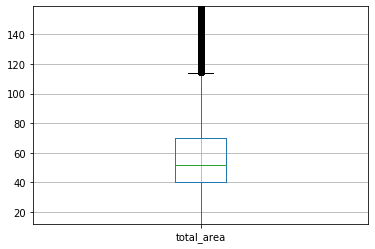

In [44]:
#Убираем редкие и выбивающиеся значения для общей площади
#data_wo_anomaly = real_estate_data.query('total_area >= 30 and total_area <= 400')
garbage_total_area = BoxplotBuilder(real_estate_data,'total_area')
data_wo_anomaly = real_estate_data.query('total_area >= @garbage_total_area[0] and total_area <= @garbage_total_area[1]')

Отбрасываем значения last_price < 12190.0 и > 10725000.0


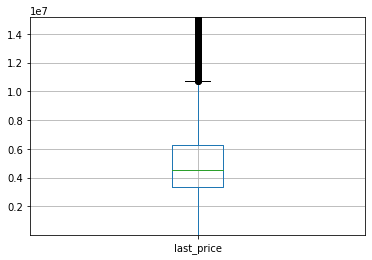

In [45]:
#Убираем редкие и выбивающиеся значения для цены
#data_wo_anomaly = data_wo_anomaly.query('last_price >= 450000 and last_price <= 100000000')
garbage_last_price = BoxplotBuilder(data_wo_anomaly,'last_price')
data_wo_anomaly = data_wo_anomaly.query('last_price >= @garbage_last_price[0] and last_price <= @garbage_last_price[1]')

Отбрасываем значения rooms < 0.0 и > 6.0


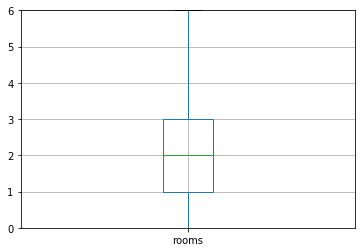

In [46]:
#Убираем редкие и выбивающиеся значения для количества комнат
#data_wo_anomaly = data_wo_anomaly.query('rooms >= 1 and rooms <= 9')
garbage_rooms = BoxplotBuilder(data_wo_anomaly,'rooms')
data_wo_anomaly = data_wo_anomaly.query('rooms >= @garbage_rooms[0] and rooms <= @garbage_rooms[1]')

Отбрасываем значения ceiling_height < 2.125 и > 3.125


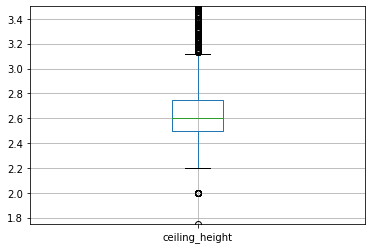

In [47]:
#Убираем редкие и выбивающиеся значения для высоты потолков
#data_wo_anomaly = data_wo_anomaly.query('ceiling_height >= 2.5 and ceiling_height <= 4.6')
garbage_ceiling_height = BoxplotBuilder(data_wo_anomaly,'ceiling_height')
data_wo_anomaly = data_wo_anomaly.query('ceiling_height >= @garbage_ceiling_height[0] and ceiling_height <= @garbage_ceiling_height[1]')

Отбрасываем значения days_exposition < 1.0 и > 498.0


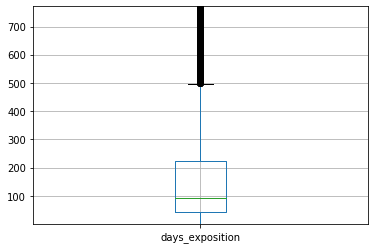

In [48]:
#Убираем редкие и выбивающиеся значения для продолжительности продажи
#data_wo_anomaly = data_wo_anomaly.query('days_exposition >= 3 and days_exposition <= 1400')
garbage_days_exposition = BoxplotBuilder(data_wo_anomaly,'days_exposition')
data_wo_anomaly = data_wo_anomaly.query('days_exposition >= @garbage_days_exposition[0] and days_exposition <= @garbage_days_exposition[1]')

In [49]:
print('И осталось у нас записей:',data_wo_anomaly.shape[0])

И осталось у нас записей: 9408


In [50]:
data_wo_anomaly.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,price_metr,weekday,month,year,first_day_exposition_unix,living_and_total,kitchen_and_total
count,9.408000e+03,9408.000000,9408.000000,9408.000000,9408.000000,9408.000000,9408.000000,9408.000000,7320.000000,9408.000000,9408.000000,9408.000000,9408.000000,9408.000000,9.408000e+03,9408.000000,9408.000000
mean,4.648729e+06,51.074397,1.875000,2.644279,10.645408,29.402141,5.781144,9.180065,15484.012022,124.809843,92310.114249,2.535714,6.564201,2017.522747,1.515511e+18,0.570463,0.189198
std,1.902181e+06,16.372414,0.862073,0.149476,6.245339,11.716727,4.684229,3.418961,8288.638367,117.550334,27658.853227,1.792642,3.510909,0.805341,2.455541e+16,0.114094,0.068174
min,1.219000e+04,12.000000,0.000000,2.200000,1.000000,-26.000000,1.000000,0.945000,329.000000,1.000000,111.834862,0.000000,1.000000,2015.000000,1.425773e+18,-0.430464,0.023095
25%,3.350000e+06,38.300000,1.000000,2.500000,5.000000,18.200000,2.000000,7.000000,11285.000000,38.000000,76103.983467,1.000000,3.000000,2017.000000,1.502928e+18,0.500000,0.138462
50%,4.350000e+06,47.300000,2.000000,2.600000,9.000000,29.000000,4.000000,8.800000,13878.000000,82.000000,93080.579882,2.000000,7.000000,2018.000000,1.517530e+18,0.570770,0.177419
75%,5.690000e+06,61.000000,2.000000,2.730000,15.000000,37.000000,8.000000,10.600000,16577.000000,179.000000,108536.585366,4.000000,10.000000,2018.000000,1.534896e+18,0.638827,0.231411
max,1.070000e+07,114.000000,6.000000,3.120000,60.000000,92.000000,27.000000,43.200000,64857.000000,498.000000,312240.000000,6.000000,12.000000,2019.000000,1.556669e+18,2.307692,0.723270


In [51]:
data_wo_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9408 entries, 4 to 23693
Data columns (total 20 columns):
last_price                   9408 non-null float64
total_area                   9408 non-null float64
first_day_exposition         9408 non-null datetime64[ns]
rooms                        9408 non-null int64
ceiling_height               9408 non-null float64
floors_total                 9408 non-null int64
living_area                  9408 non-null float64
floor                        9408 non-null int64
kitchen_area                 9408 non-null float64
locality_name                9408 non-null object
cityCenters_nearest          7320 non-null float64
days_exposition              9408 non-null float64
price_metr                   9408 non-null float64
weekday                      9408 non-null int64
month                        9408 non-null int64
year                         9408 non-null int64
first_day_exposition_unix    9408 non-null int64
floor_category               9408

---

Отсечены следующие редкие и выбивающиеся значения с учетом данных диаграмм размаха:
1. Для общей площади диапазоны меньше 12.0 и больше 114.25. м кв.
2. Для стоимости квартиры диапазоны меньше 12190 р. и больше 10725000 р.
3. Для количества комнат диапазоны меньше 0 и больше 6 комнат.
4. Для высоты потолков диапазоны меньше 2.125 и больше 3.125 м
5. Для времени продажи диапазоны меньше 1 дня и больше 498 дней.

Количество объявлений сократилось с 23650 до 9408. 

Коэффициент корреляции Пирсона для цены квартиры и метража 0.6754812593375342


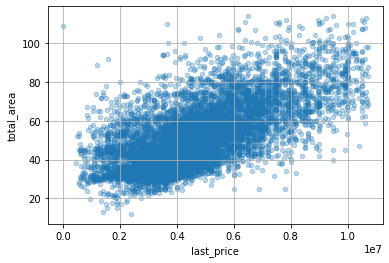

In [52]:
#Изучаем, как зависит цена квартиры от квадратного метра (метража)
data_wo_anomaly.plot(x='last_price', y='total_area', kind='scatter',grid=True, alpha=0.3)
print('Коэффициент корреляции Пирсона для цены квартиры и метража',data_wo_anomaly['last_price'].corr(data_wo_anomaly['total_area']))

Коэффициент корреляции Пирсона для цены квартиры и количества комнат 0.42074273564724046


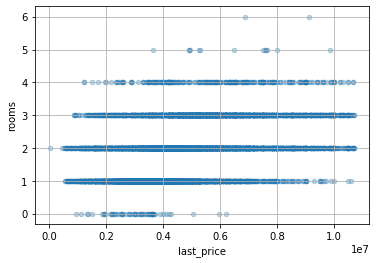

In [53]:
#Изучаем, как зависит цена квартиры от числа комнат
data_wo_anomaly.plot(x='last_price', y='rooms', kind='scatter',grid=True, alpha=0.3)
print('Коэффициент корреляции Пирсона для цены квартиры и количества комнат',data_wo_anomaly['last_price'].corr(data_wo_anomaly['rooms']))

Коэффициент корреляции Пирсона для цены квартиры и удаленности от центра -0.3074197998484519


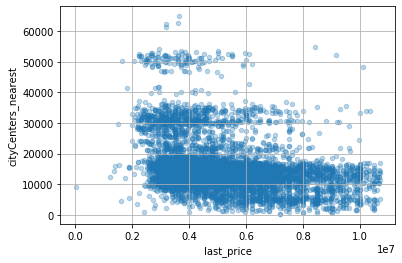

In [54]:
#Изучаем, как зависит цена квартиры от удалённости от центра
data_wo_anomaly.plot(x='last_price', y='cityCenters_nearest', kind='scatter',grid=True, alpha=0.3)
print('Коэффициент корреляции Пирсона для цены квартиры и удаленности от центра',data_wo_anomaly['last_price'].corr(data_wo_anomaly['cityCenters_nearest']))

Коэффициент корреляции Пирсона для цены квартиры и категории этажа 0.03791478164610718


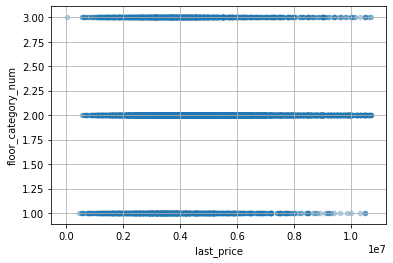

In [55]:
#Изучаем, как зависит цена квартиры от категории этажа
#со строковыми значениями диаграмма и рассчет коэффициента не работают, переводим в int
data_wo_anomaly['floor_category_num'] = data_wo_anomaly['floor_category']
#data_wo_anomaly.head()
data_wo_anomaly.loc[data_wo_anomaly['floor_category'] == 'первый', 'floor_category_num'] = '1'
data_wo_anomaly.loc[data_wo_anomaly['floor_category'] == 'другой', 'floor_category_num'] = '2'
data_wo_anomaly.loc[data_wo_anomaly['floor_category'] == 'последний', 'floor_category_num'] = '3'
#меняем тип данных на int
data_wo_anomaly['floor_category_num'] = data_wo_anomaly['floor_category_num'].astype('int')
data_wo_anomaly.plot(x='last_price', y='floor_category_num', kind='scatter',grid=True, alpha=0.3)
print('Коэффициент корреляции Пирсона для цены квартиры и категории этажа',data_wo_anomaly['last_price'].corr(data_wo_anomaly['floor_category_num']))


Коэффициент корреляции Пирсона для цены квартиры и дня недели -0.02044857313734127


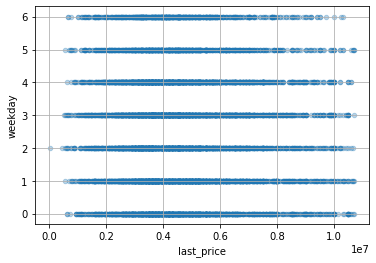

In [56]:
#Изучаем, как зависит цена квартиры от дня недели
data_wo_anomaly.plot(x='last_price', y='weekday', kind='scatter',grid=True, alpha=0.3)
print('Коэффициент корреляции Пирсона для цены квартиры и дня недели',data_wo_anomaly['last_price'].corr(data_wo_anomaly['weekday']))

Коэффициент корреляции Пирсона для цены квартиры и месяца 0.00859837275189465


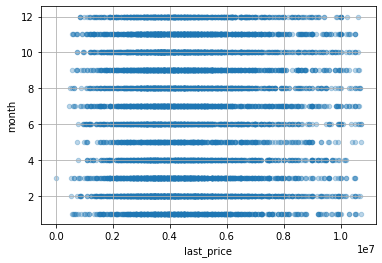

In [57]:
#Изучаем, как зависит цена квартиры от месяца
data_wo_anomaly.plot(x='last_price', y='month', kind='scatter',grid=True, alpha=0.3)
print('Коэффициент корреляции Пирсона для цены квартиры и месяца',data_wo_anomaly['last_price'].corr(data_wo_anomaly['month']))

Коэффициент корреляции Пирсона для цены квартиры и года 0.008596871657262221


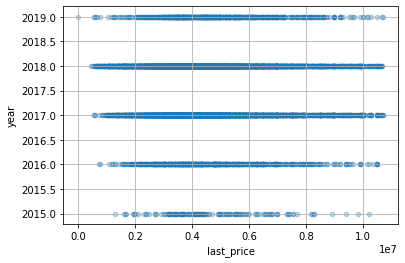

In [58]:
#Изучаем, как зависит цена квартиры от года
data_wo_anomaly.plot(x='last_price', y='year', kind='scatter',grid=True, alpha=0.3)
print('Коэффициент корреляции Пирсона для цены квартиры и года',data_wo_anomaly['last_price'].corr(data_wo_anomaly['year']))

С учетом новых диапазонов отсечки редких и выбивающихся значений коэффициенты кореляции Пирсона изменились, но не сильно. Значения следующие (в порядке убывания):
1. Для взаимосвязи цены квартиры и метража: 0.67 (достаточно сильная взаимосвязь - при увеличении метража растет и стоимость квартиры).
2. Для цены квартиры и количества комнат: 0.42 (слабая либо нелинейная взаимосвязь).
3. Для цены квартиры и удаленности от центра: -0.30 (слабая либо нелинейная взаимосвязь).
4. Для цены квартиры и категории этажа: 0.03 (взаимосвязи нет).   
5. Для цены квартиры и дня недели -0.02 (взаимосвязи нет).
6. Для цены квартиры и месяца: 0.00 (взаимосвязи нет).
7. Для цены квартиры и года: 0.00 (взаимосвязи нет).

Из всех рассмотренных параметров больше всего влияет на стоимость квартиры ее метраж, следом идет количество комнат, все прочие на цену квартиры влияют мало.

In [59]:
#Горячая десятка по количеству объявлений
data_wo_anomaly['locality_name'].value_counts().sort_values(ascending=False).head(10) 

Санкт-Петербург    6246
Всеволожск          196
Мурино              189
Шушары              174
Колпино             161
Кудрово             160
Пушкин              150
Парголово           115
Гатчина             111
Петергоф            107
Name: locality_name, dtype: int64

In [60]:
#смотрим среднюю стоимость 1м кв. по городам из десятки
#top_locality_count = ['Санкт-Петербург','Мурино','Кудрово','Шушары','Всеволожск','Пушкин','Колпино','Парголово','Гатчина','Выборг']
top_locality_count = ['Санкт-Петербург','Всеволожск','Мурино','Шушары','Колпино','Кудрово','Пушкин','Парголово','Гатчина','Петергоф']
data_top_locality = data_wo_anomaly.query('locality_name in @top_locality_count')
locality_price_metr_mean_med = data_top_locality.pivot_table(index='locality_name', values='price_metr', aggfunc=['mean','median'])
locality_price_metr_mean_med.columns = ['price_metr_mean','price_metr_med']
#Горячая десятка стоимости квадратного метра
locality_price_metr_mean_med.sort_values(by = 'price_metr_med',ascending = False).head(10)

,price_metr_mean,price_metr_med
locality_name,,
Санкт-Петербург,104092.480637,101015.254587
Пушкин,98404.343806,97051.945571
Кудрово,95311.659959,96560.223262
Парголово,89570.355642,90351.176270
Мурино,87724.947604,86513.994911
Петергоф,82924.696035,80858.085809
Шушары,78785.383052,77355.715871
Колпино,74803.357997,72948.717949
Гатчина,70002.057544,69444.444444


Выбрали 10 населённых пунктов с наибольшим числом объявлений (на первом месте конечно же Санкт-Петербург - у него 66% объявлений). 

Посчитали среднюю цену квадратного метра в этих населённых пунктах. Самая высокая цена за квадратный метр ожидаемо в Санкт-Петербурге. Сама низкая цена за квадратный метр из TOP-10 - во Всеволожске. 

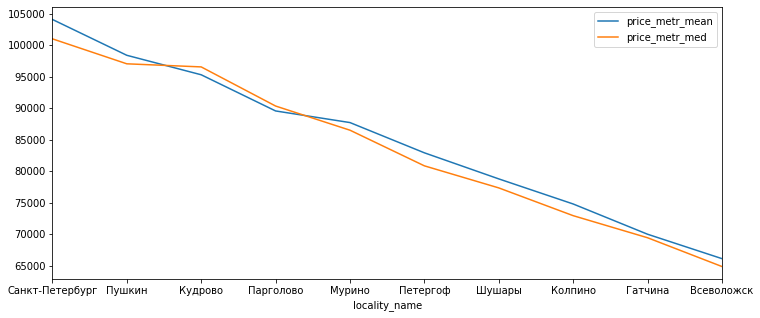

In [61]:
# Строим график зависимости цены от местоположения
locality_price_metr_mean_med.sort_values(by = 'price_metr_med',ascending = False).plot(figsize=(12,5))

In [62]:
#Создаем столбец с расстоянием до центра в километрах, округляем, переводим в int
data_spb = data_wo_anomaly.query('locality_name == "Санкт-Петербург"').copy()

#Удаляем строки с пропусками в cityCenters_nearest
data_spb.dropna(subset = ['cityCenters_nearest'], inplace = True)

data_spb.loc[:,'cityCenters_km'] = round(data_spb['cityCenters_nearest']/1000)
data_spb['cityCenters_km'] = data_spb['cityCenters_km'].astype('int')
#data_spb.info()

In [63]:
#Считаем среднюю цену за кв.метр для каждого километра
data_spb_mean_med = data_spb.pivot_table(index='cityCenters_km', values='price_metr', aggfunc=['mean','median'])
data_spb_mean_med.columns = ['price_metr_mean','price_metr_med']
#data_spb_mean_med['price_metr_mean_prev'] = data_spb_mean_med['price_metr_mean'].shift()
#data_spb_mean_med['price_metr_med_prev'] = data_spb_mean_med['price_metr_med'].shift()
data_spb_mean_med

,price_metr_mean,price_metr_med
cityCenters_km,,
0,95000.000000,95000.000000
1,118723.240948,110524.364081
2,116177.224934,107644.489247
3,103029.482076,99772.500000
4,113892.687186,103125.000000
5,125547.496110,122576.875541
6,119347.132299,115000.000000
7,117224.911912,116268.507260
8,114132.051137,111320.754717


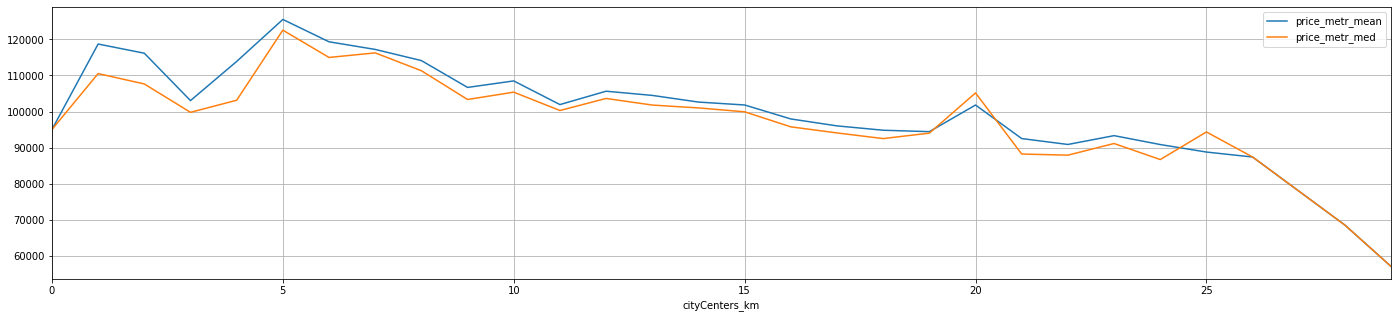

In [64]:
# Строим график зависимости цены от удаленности
data_spb_mean_med.plot(figsize=(24,5),grid=True)

Выделили объявления по Санкт-Петербургу, создали доп. столбец с расстоянием от центра в километрах, посчитали среднее значение и медиану цены для каждого километра, построили график зависимости цены от удаленности до центра.

На графике видно, что цена при удалении от центра резко падает до отметки 5 км и после нее снижается уже более плавно. Т.е. центральная зона у нас это окружность с радиусом 5 км.

In [65]:
#Выделяем сегмент квартир в центре СПб
#data_spb_center = data_spb.query('cityCenters_km <= 3').copy()
data_spb_center = data_spb.query('cityCenters_km <= 5').copy()
data_spb_center.shape[0]

400

In [66]:
data_spb_center_des = data_spb_center.describe()
data_spb_center_des

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,price_metr,weekday,month,year,first_day_exposition_unix,living_and_total,kitchen_and_total,floor_category_num,cityCenters_km
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,7.023223e+06,62.951450,2.260000,2.864150,6.257500,36.757675,3.570000,10.742125,3879.977500,146.165000,117573.327709,2.432500,6.852500,2017.357500,1.511068e+18,0.579270,0.181605,2.042500,3.837500
std,1.843908e+06,20.527111,0.979694,0.173259,3.294439,15.199695,2.199362,4.326266,1247.191171,129.343621,31340.888321,1.687472,3.415393,0.843488,2.590976e+16,0.123450,0.076740,0.609609,1.260979
min,1.600000e+06,12.000000,0.000000,2.400000,2.000000,6.000000,1.000000,1.000000,329.000000,3.000000,17391.304348,0.000000,1.000000,2015.000000,1.430870e+18,0.141304,0.070191,1.000000,0.000000
25%,5.738750e+06,46.225000,2.000000,2.750000,4.000000,25.000000,2.000000,8.000000,3142.500000,53.000000,94567.632850,1.000000,4.000000,2017.000000,1.499558e+18,0.509896,0.125415,2.000000,3.000000
50%,7.000000e+06,62.500000,2.000000,2.900000,5.000000,35.000000,3.000000,10.000000,4233.000000,97.500000,110000.000000,3.000000,7.000000,2017.000000,1.512432e+18,0.585061,0.165154,2.000000,4.000000
75%,8.404500e+06,76.075000,3.000000,3.000000,7.000000,46.925000,5.000000,12.325000,4844.000000,220.000000,134650.954121,4.000000,10.000000,2018.000000,1.531181e+18,0.656901,0.217442,2.000000,5.000000
max,1.070000e+07,112.000000,6.000000,3.120000,25.000000,84.500000,19.000000,39.700000,5486.000000,497.000000,240000.040000,6.000000,12.000000,2019.000000,1.555891e+18,1.200000,0.548387,3.000000,5.000000


In [67]:
data_spb_des = data_spb.describe()
data_spb_des

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,price_metr,weekday,month,year,first_day_exposition_unix,living_and_total,kitchen_and_total,floor_category_num,cityCenters_km
count,6.239000e+03,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000,6.239000e+03,6239.000000,6239.000000,6239.000000,6239.000000
mean,5.292664e+06,51.747384,1.897419,2.655637,11.548646,29.838930,6.190896,9.276449,12733.636480,119.460651,104064.292578,2.530694,6.624459,2017.532778,1.515976e+18,0.571418,0.188728,2.000801,12.736496
std,1.769828e+06,16.570383,0.874302,0.156110,6.030102,11.857408,4.751093,3.436371,3985.656514,115.850013,21720.538486,1.780963,3.488522,0.817123,2.474179e+16,0.113568,0.067378,0.468808,4.002019
min,1.219000e+04,12.000000,0.000000,2.300000,1.000000,2.000000,1.000000,0.945000,329.000000,1.000000,111.834862,0.000000,1.000000,2015.000000,1.425773e+18,0.038462,0.040000,1.000000,0.000000
25%,3.950000e+06,39.100000,1.000000,2.500000,7.000000,18.700000,3.000000,7.000000,10813.000000,33.000000,89440.133214,1.000000,3.000000,2017.000000,1.502885e+18,0.501739,0.137931,2.000000,11.000000
50%,4.900000e+06,48.200000,2.000000,2.600000,9.000000,29.600000,5.000000,8.700000,13051.000000,76.000000,100993.710692,2.000000,7.000000,2018.000000,1.517616e+18,0.571429,0.177586,2.000000,13.000000
75%,6.300000e+06,62.000000,3.000000,2.750000,16.000000,37.500000,9.000000,10.800000,15228.000000,169.000000,115720.524017,4.000000,10.000000,2018.000000,1.535587e+18,0.639167,0.232416,2.000000,15.000000
max,1.070000e+07,114.000000,6.000000,3.120000,52.000000,84.500000,27.000000,41.000000,29493.000000,498.000000,312240.000000,6.000000,12.000000,2019.000000,1.556669e+18,2.307692,0.692308,3.000000,29.000000


Выделили сегмент квартир в центре. Через describe() получили числовое описание данных по квартирам в СПб и отдельно описание данных по квартирам в центре СПб (в радиусе 5 км от центра).

1. Площадь. Медианное значение площади квартиры в центре СПб как правило больше на 30% медианного значения площади квартир во всем СПб.

2. Цена на квартиры в центре СПб также больше (на 10%) цен на квартиры в Санкт-Петербурге.

3. Медианное число комнат в квартирах в центре и в СПб одинаковое.

4. Потолки в центре выше.

В общем, всем квартиры в центре хороши - и площади большие, и комнат много, и потолки высокие. Дорогие только.

Далее - гистограммы для наглядности по квартирам в центре СПб и в целом по квартирам в СПб.

In [68]:
#Функция построения графика из таблицы с данными по центру и таблицы с данными по СПб
def PlotBuilderSpb(param,hist_title):
    b=6
    a=0.5
    ax = data_spb_center.plot(kind='hist',density=1, color='darkblue', y=param, histtype='step', range=(data_spb_center_des[param][3],data_spb_center_des[param][7]), linewidth=3, bins=b, alpha=a, label='центр')
    data_spb.plot(title=hist_title,kind='hist',density=1, color='orange', y=param, histtype='step', range=(data_spb_des[param][3],data_spb_des[param][7]), linewidth=3, bins=b, alpha=a, label='СПб', ax=ax, grid=True, legend=True)

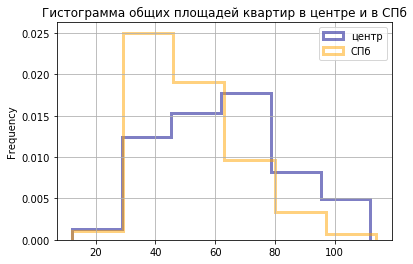

In [71]:
#График общих площадей квартир в центре и в СПб
PlotBuilderSpb('total_area','Гистограмма общих площадей квартир в центре и в СПб')

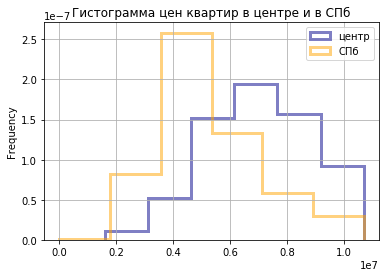

In [74]:
#Цена квартир в центре и в СПб
PlotBuilderSpb('last_price','Гистограмма цен квартир в центре и в СПб')

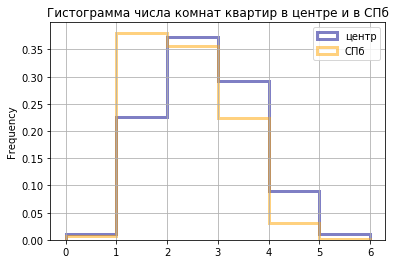

In [77]:
#Число комнат в центре и в СПб
PlotBuilderSpb('rooms','Гистограмма числа комнат квартир в центре и в СПб')

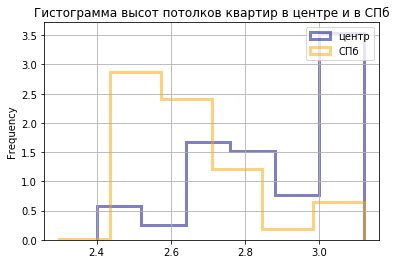

In [80]:
#Высота потолков в центре и в СПб
PlotBuilderSpb('ceiling_height','Гистограмма высот потолков квартир в центре и в СПб')

In [81]:
#Функция построения диаграм рассеяния из таблицы с данными по центру и таблицы с данными по СПб
def ScatterBuilderSpb(param_x,param_y,param_txt):
    print('Коэффициент корреляции Пирсона для цены квартиры и',param_txt,'в центре',data_spb_center[param_x].corr(data_spb_center[param_y]))
    print('Коэффициент корреляции Пирсона для цены квартиры и',param_txt,'во всем СПб',data_spb[param_x].corr(data_spb[param_y]))

    a = 0.3
    ax =data_spb.plot(color='darkblue', x=param_x, y=param_y, kind='scatter',grid=True, alpha=a, label='центр')
    data_spb_center.plot(color='orange', x=param_x, y=param_y, kind='scatter',grid=True, alpha=a, label='СПб', ax=ax, legend=True)
    

Коэффициент корреляции Пирсона для цены квартиры и количества комнат в центре 0.42949555596751743
Коэффициент корреляции Пирсона для цены квартиры и количества комнат во всем СПб 0.4879308922130485


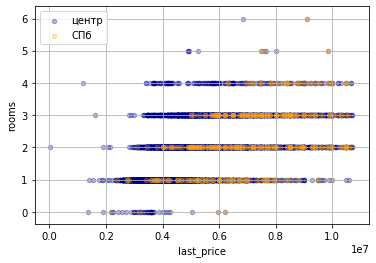

In [82]:
#Изучаем, как зависит цена квартиры в центре СПб от количества комнат
#data_spb_center.plot(x='last_price', y='rooms', kind='scatter',grid=True, alpha=0.3)
#Изучаем, как зависит цена квартиры в СПб от количества комнат
#data_spb.plot(x='last_price', y='rooms', kind='scatter',grid=True, alpha=0.3,color = "skyblue")
#print('Коэффициент корреляции Пирсона для цены квартиры и количества комнат в центре СПб',data_spb_center['last_price'].corr(data_spb_center['rooms']))
#print('Коэффициент корреляции Пирсона для цены квартиры и количества комнат во всем СПб',data_spb['last_price'].corr(data_spb['rooms']))
ScatterBuilderSpb('last_price','rooms','количества комнат')

Коэффициент корреляции Пирсона для цены квартиры и этажа в центре 0.24474683868246172
Коэффициент корреляции Пирсона для цены квартиры и этажа во всем СПб 0.10066060214514351


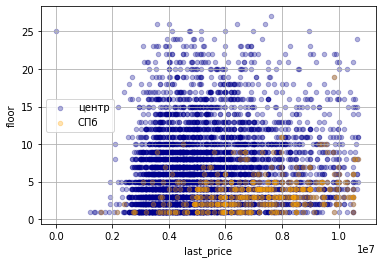

In [83]:
#Изучаем, как зависит цена квартиры в центре СПб от этажа
#data_spb_center.plot(x='last_price', y='floor', kind='scatter',grid=True, alpha=0.3)
#print('Коэффициент корреляции Пирсона для цены квартиры и этажа в центре СПб',data_spb_center['last_price'].corr(data_spb_center['floor']))
#Изучаем, как зависит цена квартиры в СПб от этажа
#data_spb.plot(x='last_price', y='floor', kind='scatter',grid=True, alpha=0.3,color = "skyblue")
#print('Коэффициент корреляции Пирсона для цены квартиры и этажа во всем СПб',data_spb['last_price'].corr(data_spb['floor']))
ScatterBuilderSpb('last_price','floor','этажа')

Коэффициент корреляции Пирсона для цены квартиры и удаленности от центра в центре -0.021484957444265675
Коэффициент корреляции Пирсона для цены квартиры и удаленности от центра во всем СПб -0.27555156512803486


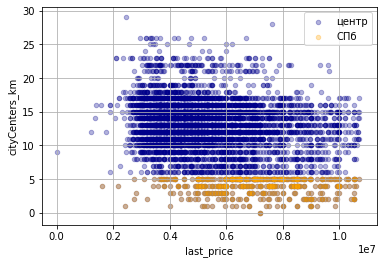

In [84]:
#Изучаем, как зависит цена квартиры в центре СПб от удаленности от центра
#data_spb_center.plot(x='last_price', y='cityCenters_km', kind='scatter',grid=True, alpha=0.3)
#print('Коэффициент корреляции Пирсона для цены квартиры и удаленности от центра в центре СПб',data_spb_center['last_price'].corr(data_spb_center['cityCenters_km']))
#Изучаем, как зависит цена квартиры в СПб от удаленности от центра
#data_spb.plot(x='last_price', y='cityCenters_km', kind='scatter',grid=True, alpha=0.3,color = "skyblue")
#print('Коэффициент корреляции Пирсона для цены квартиры и удаленности от центра во всем СПб',data_spb['last_price'].corr(data_spb['cityCenters_km']))
ScatterBuilderSpb('last_price','cityCenters_km','удаленности от центра')

Коэффициент корреляции Пирсона для цены квартиры и даты размещения объявления в центре -0.011700311937898548
Коэффициент корреляции Пирсона для цены квартиры и даты размещения объявления во всем СПб 0.01785825036087372


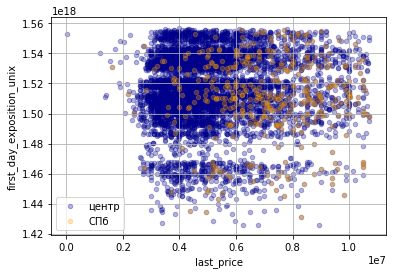

In [85]:
#Изучаем, как зависит цена квартиры в центре СПб от даты размещения объявления
#data_spb_center.plot(x='last_price', y='first_day_exposition_unix', kind='scatter',grid=True, alpha=0.3)
#print('Коэффициент корреляции Пирсона для цены квартиры и даты размещения объявления в центре СПб',data_spb_center['last_price'].corr(data_spb_center['first_day_exposition_unix']))
#Изучаем, как зависит цена квартиры в СПб от даты размещения объявления
#data_spb.plot(x='last_price', y='first_day_exposition_unix', kind='scatter',grid=True, alpha=0.3,color = "skyblue")
#print('Коэффициент корреляции Пирсона для цены квартиры и даты размещения объявления во всем СПб',data_spb['last_price'].corr(data_spb['first_day_exposition_unix']))
ScatterBuilderSpb('last_price','first_day_exposition_unix','даты размещения объявления')

Что можно сказать, глядя на диаграммы рассеяния:

1. Цена квартир слабо связана с числом комнат, и для квартир в центре эта взаимосвязь меньше чем для квартир в целом по Санкт-Петербургу.

2. То, на каком этаже квартира, мало влияет на ее стоимость, хотя для квартир в центре эта связь сильнее в 2 раза - оно и понятно - центр, туристы, шум - лучше повыше забраться. Причем в центре продаются квартиры не выше 6 этажа, по СПб же вариантов этажей больше - многоэтажки внесли свой вклад. 

3. Удалённость от центра слабо связана с ценой на квартиры, хотя в целом по СПб эта связь сильнее, чем в центре. Оно и понятно - центр маленький (окружность с радиусом 5 км) и разность в удалении от центральной точки особо значения не имеет. За центром уже расстояния побольше, потому и удаленность от центра в 10 раза важнее.

4. Связи между датой размещения объявления и ценой никакой нет. Видимо, цены на недвижку в период 2014-2019 особо не росли.

### Шаг 5. Общий вывод

Вывод такой: на стоимость квартиры в первую очередь влияет ее метраж. Далее, менее значительно, влияют (в порядке убывания): количество комнат, удаленность от центра, этаж, на котором расположена квартира. 

Интересно было бы еще посмотреть на зависимость цены квартиры от года постройки или типа дома (сталинка, хрущевка - вот это все), необходимости ремонта, типа рынка (первичный/вторичный). Было б интересно срез взять не за пять лет, а за более длительный период - возможно, тогда дата размещения объявления о продаже сильнее бы влияла на стоимость квартиры.

Начальные данные могли бы быть и получше, много пропусков. Вообще показалось, что база слеплена из файлов, взятых из разных источников.

Можно было бы объединить объявления из городов, по которым не более 1-3 объявлений, в одну группу "Прочие", но поскольку такой задачи не стояло, не стал этим заниматься.  